# 1 - Introduction

Dataset resource : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Identity
<p> Name : Shafira Laksitasari </p>
<p> Batch : FTDS-014 </p>
<p> Dataset : Pima Indians Diabetes Database </p>
<p> Objective : Predict the onset of diabetes based on diagnostic measures </p>

## Description
I am a data scientist from Hospital X assigned to create a model that can detect whether a person has diabetes or not with this provided dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The data contained :
1. Pregnancies : Number of times pregnant
2. Glucose : lasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure : Diastolic blood pressure (mm Hg)
4. SkinThickness : Triceps skin fold thickness (mm)
5. Insulin : 2-Hour serum insulin (mu U/ml)
6. BMI : Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction : Diabetes pedigree function
8. Age : Years
9. Outcome : Class variable (0 or 1)

## Objective
Create a machine learning model to classify whether the person has diabetes or not.


# 2 - Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Split
from bitarray import test
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

import joblib
import json

# 3 - Data Loading

In [3]:
# Display max column
pd.set_option("display.max.columns", None)

In [4]:
# Import data
df = pd.read_csv('h8dsft_Milestone2P1_shafira_laksitasari.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Check Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Based on the information there aren't any null data. From the data that are all numerical, the data types are also compatible.

In [6]:
# Check Dataset for mean, std, min, qartile, and max

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The data contains patient information from the age range of 21 to 81 years. From the description above, the average number of patients who gave birth was 4 times. As for average of each attributes, blood glucose concentration is 120.9, blood pressure is 69 mm Hg, skin thickness is 20.5 mm, insulin is 79.8 mu U/ml, BMI is 32 kg/(height in m)^2, diabetes pedigree function is 0.47, and his age is 33.2 years.

# 4 - Exploratory Data Analysis (EDA)

The data only explains whether the person has diabetes or not. But actually there are several types of diabetes. Quoted from health Kompas, diabetes is a condition that interferes with the body's ability to process glucose in the blood. There are 3 types of diabetes, namely type 1 diabetes, type 2 diabetes, and gestational diabetes. Diabetes 1 is a disease that attacks autoimmunity, Diabetes 2 is a condition when blood sugar levels exceed normal limits, and last gestational diabetes that occurs in pregnant women. All of these diseases are caused by a disturbance in insulin.

https://health.kompas.com/read/2020/06/27/120000868/diabetes--jenis-gejala-penyebab-komplikasi-dan-perawatan?page=all

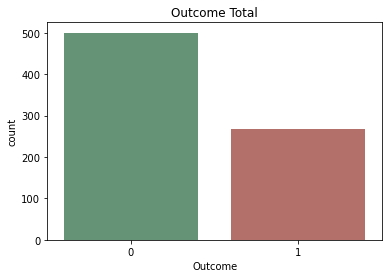

In [7]:
sns.countplot(x='Outcome', data=df, palette=['#5c9c73',"#bf645e"])
plt.title('Outcome Total')
plt.show()

In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Description : Outcome (0 = Do Not Have Diabetes, 1 = Have Diabetes)

From the graph above, the number of data classes 0 (No Diabetes) is larger than the number of data classes 1 (Diabetes). It can be concluded that the current data is imbalance.

<Figure size 720x504 with 0 Axes>

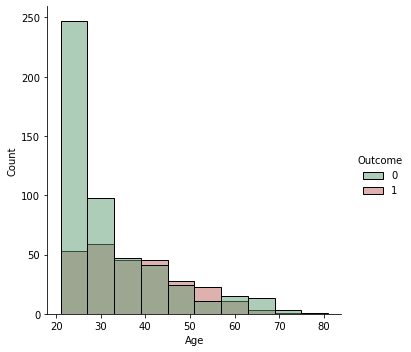

In [9]:
plt.figure(figsize=(10,7))
sns.displot(df, x="Age", hue="Outcome", bins=10, palette=['#5c9c73',"#bf645e"])

Description : Outcome (0 = Do Not Have Diabetes, 1 = Have Diabetes)

In general, according to the CDC (Center for Disease Control and Prevention) age is one of the important factors causing diabetes. In general, Type 1 Diabetes is more common at a young age, while Type 2 Diabetes is generally found at the age of 45 years and over. Lastly, Gestational Diabetes, which has been previously described occurs during pregnancy but this type of diabetes can disappear when a woman has given birth. Based on the distplot above, when viewed from the age range, anyone can get diabetes. This data does not provide information on what type of diabetes these patients have so it might be difficult to classify.

https://www.cdc.gov/diabetes/basics/risk-factors.html
https://www.webmd.com/diabetes/diabetes-link-age

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

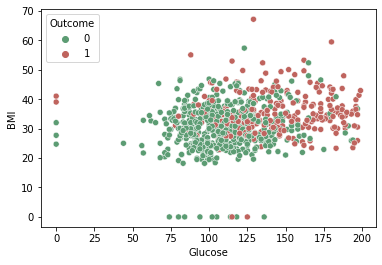

In [10]:
sns.scatterplot(x='Glucose',y='BMI',data=df,hue='Outcome', palette=['#5c9c73',"#bf645e"])

Description : Outcome (0 = Do Not Have Diabetes, 1 = Have Diabetes)

Based on National Library f Medicine, A person's BMI level is one of the factors that cause Type 2 Diabetes. The surveys showed that an increase in BMI is generally associated with a significant increase in prevalence of diabetes mellitus. Also quoted from a journal, there is a relationship between Body Mass Index (BMI) and blood sugar levels, especially in type 2 diabetics. For this reason, the scatter plot above is drawn between BMI and Glucose.

In the data we can see that there are some outliers. But on the chart, patients whose BMI and glucose are low are less likely to have Diabetes. Even though there are outliers, the data clustering is still quite explicit.

Journal : https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjE4YD2r_H5AhVQR2wGHWY9BogQFnoECAIQAQ&url=https%3A%2F%2Fjurnal.unimus.ac.id%2Findex.php%2Fjgizi%2Farticle%2Fdownload%2F752%2F806&usg=AOvVaw1DhqJbyIR3Eq95SNdamr_F
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1890993/



<Figure size 720x504 with 0 Axes>

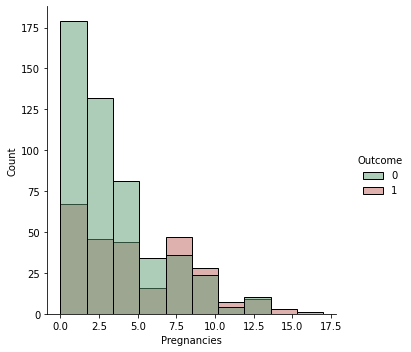

In [11]:
plt.figure(figsize=(10,7))
sns.displot(df, x="Pregnancies", hue="Outcome", bins=10, palette=['#5c9c73',"#bf645e"])

In [12]:
df[(df['Pregnancies'] == df.Pregnancies.max())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


Description : Outcome (0 = Do Not Have Diabetes, 1 = Have Diabetes)

The graph above shows the Number of times pregnant data. In fact, the highest number of births was 17 times and from the diagnosis, the person has diabetes. As previously explained, there is no information on the type of diabetes that affects the woman who is or has been pregnant because here it is only explained how many times the person gave birth. However, it is possible that some have gestational diabetes.

<Figure size 720x504 with 0 Axes>

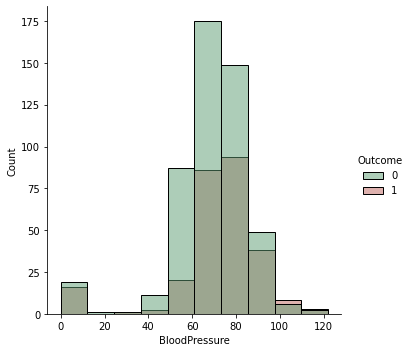

In [13]:
plt.figure(figsize=(10,7))
sns.displot(df, x="BloodPressure", hue="Outcome", bins=10, palette=['#5c9c73',"#bf645e"])

In [14]:
hpb = df[(df['BloodPressure'] > 80)]
pd.DataFrame(hpb.groupby(['BloodPressure','Outcome'])['Outcome'].count()).T

BloodPressure 82      84      85     86     88      90      92     94     95   \
Outcome         0   1   0   1   0  1   0  1   0   1   0   1   0  1   0  1   0   
Outcome        17  13  11  12   3  3  12  9  14  11  11  11   5  3   3  3   1   

BloodPressure 96     98     100    102 104 106    108    110    114 122  
Outcome         0  1   0  1   0  1   1   1   0  1   0  1   0  1   1   0  
Outcome         3  1   1  2   2  1   1   2   2  1   1  1   1  2   1   1

Description : Outcome (0 = Do Not Have Diabetes, 1 = Have Diabetes)

Blood pressure is must in between 60mmHg and 80mmHg to considered Normal. Hypertension (Highblood Pressure) might not cause diabetes directly, but it could increase the risk of someone developing diabetes if they have high blood pressure. Even The combination of high blood pressure and type 2 diabetes can greatly increase compilation sucha as having a heart attack or stroke. Based on Hopkins Medicine, if you have diabetes, you are twice as likely to have high blood pressure.
However, when viewed from the graph above, the range for people who have diabetes and do not have diabetes is similiar the only difference is number since the data is imbalance. It a;sp means diabetes can attact at any blood pressure.

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiX9r7VuPH5AhWGUWwGHbQ6DIwQFnoECAUQAQ&url=https%3A%2F%2Fwww.hopkinsmedicine.org%2Fhealth%2Fconditions-and-diseases%2Fdiabetes%2Fdiabetes-and-high-blood-pressure&usg=AOvVaw0tMROxpUUYqbuUP0-TpGYt


<Figure size 720x504 with 0 Axes>

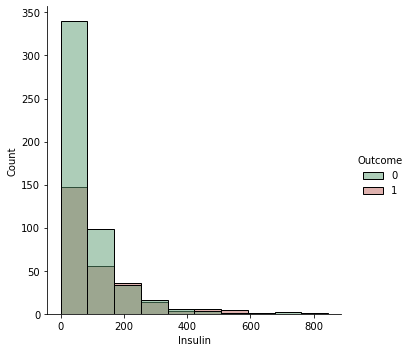

In [15]:
plt.figure(figsize=(10,7))
sns.displot(df, x="Insulin", hue="Outcome", bins=10, palette=['#5c9c73',"#bf645e"])

Description : Outcome (0 = Do Not Have Diabetes, 1 = Have Diabetes)

Excess insulin in the bloodstream causes cells in human body to absorb too much glucose (sugar) from blood. Based on the data, the insulin range for people who are not detected as having diabetes is 0 - 744 mu U/ml. Meanwhile, for those who are detected to have diabetes, the range is 0-846 mu U/ml. When viewed from the graph, the range for those who have and do not have diabetes is not too much different.

In [16]:
df[(df['Outcome'] ==1)].describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


<Figure size 720x504 with 0 Axes>

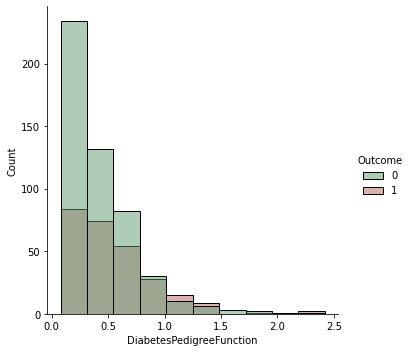

In [18]:
plt.figure(figsize=(10,7))
sns.displot(df, x="DiabetesPedigreeFunction", hue="Outcome", bins=10, palette=['#5c9c73',"#bf645e"])

Description : Outcome (0 = Do Not Have Diabetes, 1 = Have Diabetes)

Diabetes Pedigree Function is an indicator of the history of offspring affected by diabetes. This indicator measures the genetic influence, especially in families who have diabetes. When viewed from the value in people who are not diabetic, the Diabetes Pedigree Function range is 0.078 to 2,329 while in people with diabetes the range is 0.088 to 2.42. Based on the graph, the two ranges are not significantly different. However, the greater the index value, the greater the chance of having diabetes.

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiOp5vB1_L5AhVuwTgGHQHhAFEQFnoECAoQAw&url=https%3A%2F%2Fopendiabetesjournal.com%2FVOLUME%2F7%2FPAGE%2F5%2FPDF%2F&usg=AOvVaw2FMt7_2ZuJ9vJa59KFjYiV

In [24]:
df[(df['Outcome'] == 1)].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,268.0,141.257463,31.939622,0.000,119.0000,140.000,167.000,199.00
BloodPressure,268.0,70.824627,21.491812,0.000,66.0000,74.000,82.000,114.00
SkinThickness,268.0,22.164179,17.679711,0.000,0.0000,27.000,36.000,99.00
Insulin,268.0,100.335821,138.689125,0.000,0.0000,0.000,167.250,846.00
BMI,268.0,35.142537,7.262967,0.000,30.8000,34.250,38.775,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00
Outcome,268.0,1.000000,0.000000,1.000,1.0000,1.000,1.000,1.00


<Figure size 720x504 with 0 Axes>

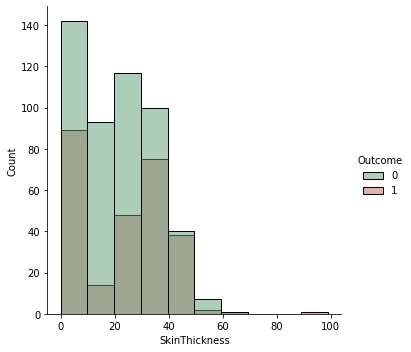

In [19]:
plt.figure(figsize=(10,7))
sns.displot(df, x="SkinThickness", hue="Outcome", bins=10, palette=['#5c9c73',"#bf645e"])

Description : Outcome (0 = Do Not Have Diabetes, 1 = Have Diabetes)

Quoted from one of the journal Diabetes, Skin thickness in diabetics will increase significantly. Skin thickness is influenced by insulin levels. The normal range for this skin thickness is 1.60 mm to 25.45 mm in male and 3.40 mm to 25.20 mm in female.
Based on the data, the largest skin thickness without diabetes was 60 mm, while the largest range for those with diabetes was 99 mm. This proves that thick skin tends to suffer from diabetes.
But the smallest range of skin thickness is 0 the possibility of a person's skin can be very small because it is very thin, only zero point something.

https://diabetesjournals.org/care/article/12/5/309/1571/Relationship-of-Skin-Thickness-to-Duration-of

# 5 - Data Prepocessing

## Get Inference

In [478]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state = 99) #change random state
df_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
129,0,105,84,0,0,27.9,0.741,62,1
113,4,76,62,0,0,34.0,0.391,25,0
288,4,96,56,17,49,20.8,0.340,26,0
610,3,106,54,21,158,30.9,0.292,24,0
6,3,78,50,32,88,31.0,0.248,26,1
22,7,196,90,0,0,39.8,0.451,41,1
258,1,193,50,16,375,25.9,0.655,24,0
392,1,131,64,14,415,23.7,0.389,21,0
593,2,82,52,22,115,28.5,1.699,25,0
143,10,108,66,0,0,32.4,0.272,42,1


In [479]:
# Remove Inference-Set from dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [480]:
# Reset Index (Minimalizing error)

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,105,84,0,0,27.9,0.741,62,1
1,4,76,62,0,0,34.0,0.391,25,0
2,4,96,56,17,49,20.8,0.340,26,0
3,3,106,54,21,158,30.9,0.292,24,0
4,3,78,50,32,88,31.0,0.248,26,1
5,7,196,90,0,0,39.8,0.451,41,1
6,1,193,50,16,375,25.9,0.655,24,0
7,1,131,64,14,415,23.7,0.389,21,0
8,2,82,52,22,115,28.5,1.699,25,0
9,10,108,66,0,0,32.4,0.272,42,1


## Feature Selection

In [481]:
# Display all columns

df_train_test.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

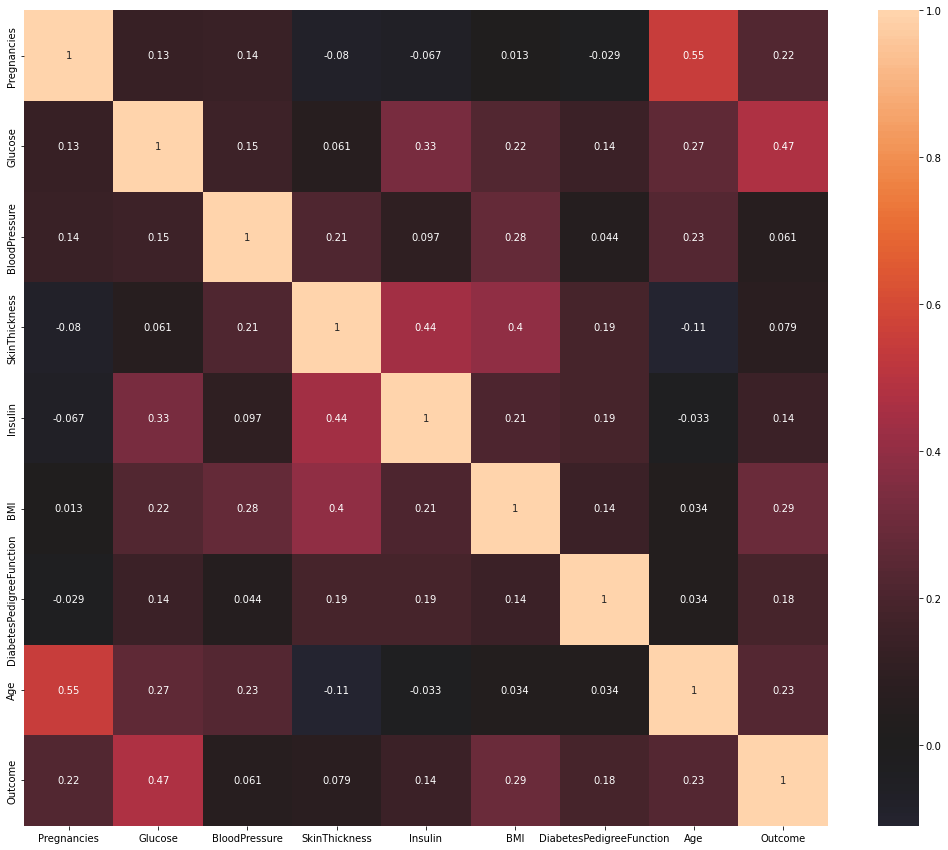

In [482]:
# Display Heatmap

train_test_corr = df_train_test.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(train_test_corr, annot= True, center=0)
plt.show()

If based on the Heatmap above, the 'Outcome' or attribute that will be predicted have positive relationship among other attributes. The highest correlation value is Plasma glucose concentration while the smallest is Blood Pressure. However, previously in the EDA it was explained that all these attributes affect diabetes, therefore later no attributes will be omitted.

In [483]:
# Define Column to Drop

# dropped_col_df = df_train_test.drop(['education','race','sex'],axis=1)
dropped_col_df = df_train_test


## Splitting between 'X' (Features) and 'y' (Target)

In [484]:
# Splitting Features and Target

X = dropped_col_df.drop('Outcome', axis = 1)
y = dropped_col_df['Outcome']

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
753,10,101,76,48,180,32.9,0.171,63
754,2,122,70,27,0,36.8,0.340,27
755,5,121,72,23,112,26.2,0.245,30
756,1,126,60,0,0,30.1,0.349,47


In [485]:
# Splitting train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13) 

# Checking train and test size

print('Features Train Size : ', X_train.shape,', Target Train Size : ', y_train.shape)
print('Features Test Size : ', X_test.shape,', Target Test Size : ', y_test.shape)

Features Train Size :  (606, 8) , Target Train Size :  (606,)
Features Test Size :  (152, 8) , Target Test Size :  (152,)


## Handling Missing Values

### Features Train

In [486]:
# Checking missing value in features train

X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

### Features Test

In [487]:
# Checking missing value in features test

X_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

### Target Train

In [488]:
# Checking missing value in target train

y_train.isnull().sum()

0

### Target Test

In [489]:
# Checking missing value in target test

y_test.isnull().sum()

0

Based on the null value check, none of the attributes have any Missing value.

## Handling Outlier

<AxesSubplot:title={'center':'Age distribution'}>

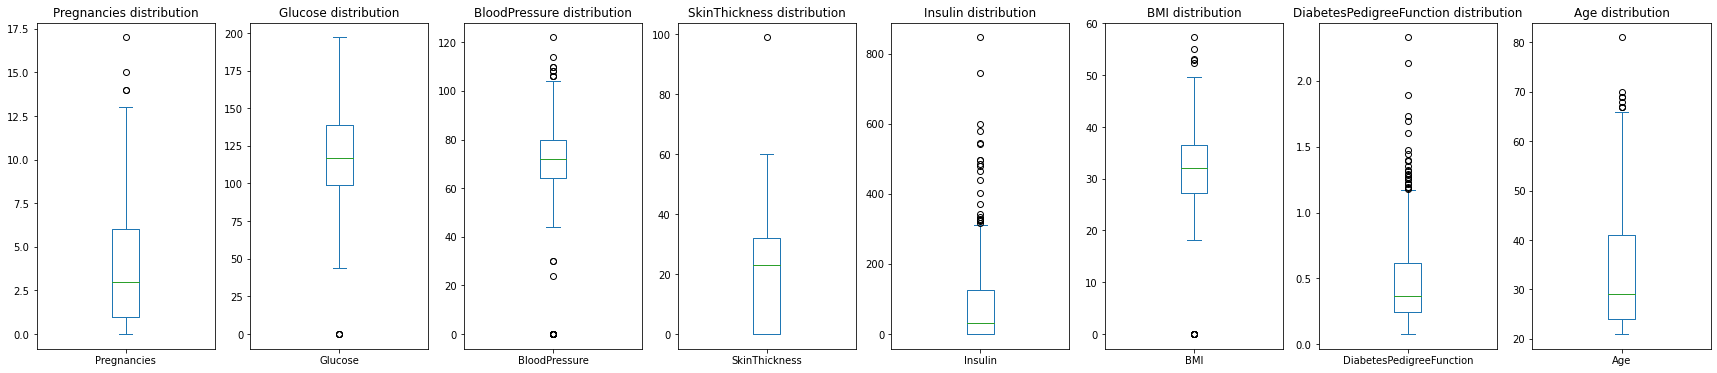

In [490]:
# Display Boxplot

fig, ax =plt.subplots(1,8, figsize = (30,6))
X_train['Pregnancies'].plot(kind='box', title='Pregnancies distribution',ax=ax[0])
X_train['Glucose'].plot(kind='box', title='Glucose distribution',ax=ax[1])
X_train['BloodPressure'].plot(kind='box', title='BloodPressure distribution',ax=ax[2])
X_train['SkinThickness'].plot(kind='box', title='SkinThickness distribution',ax=ax[3])
X_train['Insulin'].plot(kind='box', title='Insulin distribution',ax=ax[4])
X_train['BMI'].plot(kind='box', title='BMI distribution',ax=ax[5])
X_train['DiabetesPedigreeFunction'].plot(kind='box', title='DiabetesPedigreeFunction distribution',ax=ax[6])
X_train['Age'].plot(kind='box', title='Age distribution',ax=ax[7])

It can be seen from the boxplot of each feature that all features have outliers. For that case, later this outlier will be handled with Winsorizing. Winsorizing was chosen because some of the algorithms used for training are sensitive to outliers, and since the number is plenty, the data is impossible to drop.

In [491]:
# calculating iqr

Pregnancies_q3, Pregnancies_q1 = np.percentile(X_train['Pregnancies'], [75 ,25])
Glucose_q3,Glucose_q1 = np.percentile(X_train['Glucose'], [75 ,25])
BloodPressure_q3, BloodPressure_q1 = np.percentile(X_train['BloodPressure'], [75 ,25])
SkinThickness_q3, SkinThickness_q1 = np.percentile(X_train['SkinThickness'], [75 ,25])
Insulin_q3, Insulin_q1 = np.percentile(X_train['Insulin'], [75 ,25])
BMI_q3, BMI_q1 = np.percentile(X_train['BMI'], [75 ,25])
DiabetesPedigreeFunction_q3, DiabetesPedigreeFunction_q1 = np.percentile(X_train['DiabetesPedigreeFunction'], [75 ,25])
Age_q3, Age_q1 = np.percentile(X_train['Age'], [75 ,25])

Pregnancies_iqr = Pregnancies_q3 - Pregnancies_q1
Glucose_iqr = Glucose_q3 - Glucose_q1
BloodPressure_iqr = BloodPressure_q3 - BloodPressure_q1
SkinThickness_iqr = SkinThickness_q3 - SkinThickness_q1
Insulin_iqr = Insulin_q3 - Insulin_q1
BMI_iqr = BMI_q3 - BMI_q1
DiabetesPedigreeFunction_iqr = DiabetesPedigreeFunction_q3 - DiabetesPedigreeFunction_q1
Age_iqr = Age_q3 - Age_q1

# Calculating boundaries

max_Pregnancies_iqr = Pregnancies_q3 + 1.5 * Pregnancies_iqr
max_Glucose_iqr = Glucose_q3 + 1.5 * Glucose_iqr
max_BloodPressure_iqr = BloodPressure_q3 + 1.5 * BloodPressure_iqr
max_SkinThickness_iqr = SkinThickness_q3 + 1.5 * SkinThickness_iqr
max_Insulin_iqr = Insulin_q3 + 1.5 * Insulin_iqr
max_BMI_iqr = BMI_q3 + 1.5 * BMI_iqr
max_DiabetesPedigreeFunction_iqr = DiabetesPedigreeFunction_q3 + 1.5 * DiabetesPedigreeFunction_iqr
max_Age_iqr = Age_q3 + 1.5 * Age_iqr

min_Pregnancies_iqr = Pregnancies_q1 - 1.5 * Pregnancies_iqr
min_Glucose_iqr = Glucose_q1 - 1.5 * Glucose_iqr
min_BloodPressure_iqr = BloodPressure_q1 - 1.5 * BloodPressure_iqr
min_SkinThickness_iqr = SkinThickness_q1 - 1.5 * SkinThickness_iqr
min_Insulin_iqr = Insulin_q1 - 1.5 * Insulin_iqr
min_BMI_iqr = BMI_q1 - 1.5 * BMI_iqr
min_DiabetesPedigreeFunction_iqr = DiabetesPedigreeFunction_q1 - 1.5 * DiabetesPedigreeFunction_iqr
min_Age_iqr = Age_q1 - 1.5 * Age_iqr

winso_Pregnancies = X_train['Pregnancies'].copy() 
winso_Glucose = X_train['Glucose'].copy()
winso_BloodPressure = X_train['BloodPressure'].copy() 
winso_SkinThickness = X_train['SkinThickness'].copy() 
winso_Insulin = X_train['Insulin'].copy() 
winso_BMI = X_train['BMI'].copy() 
winso_DiabetesPedigreeFunction = X_train['DiabetesPedigreeFunction'].copy() 
winso_Age = X_train['Age'].copy() 

# replace the value with upper boundaries
winso_Pregnancies.loc[winso_Pregnancies> max_Pregnancies_iqr] = max_Pregnancies_iqr
winso_Glucose.loc[winso_Glucose > max_Glucose_iqr] = max_Glucose_iqr
winso_BloodPressure.loc[winso_BloodPressure> max_BloodPressure_iqr] = max_BloodPressure_iqr
winso_SkinThickness.loc[winso_SkinThickness > max_SkinThickness_iqr] = max_SkinThickness_iqr
winso_Insulin.loc[winso_Insulin> max_Insulin_iqr] = max_Insulin_iqr
winso_BMI.loc[winso_BMI > max_BMI_iqr] = max_BMI_iqr
winso_DiabetesPedigreeFunction.loc[winso_DiabetesPedigreeFunction> max_DiabetesPedigreeFunction_iqr] = max_DiabetesPedigreeFunction_iqr
winso_Age.loc[winso_Age > max_Age_iqr] = max_Age_iqr

# replace the value with lower boundaries
winso_Pregnancies.loc[winso_Pregnancies < min_Pregnancies_iqr] = min_Pregnancies_iqr
winso_Glucose.loc[winso_Glucose < min_Glucose_iqr] = min_Glucose_iqr
winso_BloodPressure.loc[winso_BloodPressure< min_BloodPressure_iqr] = min_BloodPressure_iqr
winso_SkinThickness.loc[winso_SkinThickness < min_SkinThickness_iqr] = min_SkinThickness_iqr
winso_Insulin.loc[winso_Insulin< min_Insulin_iqr] = min_Insulin_iqr
winso_BMI.loc[winso_BMI < min_BMI_iqr] = min_BMI_iqr
winso_DiabetesPedigreeFunction.loc[winso_DiabetesPedigreeFunction< min_DiabetesPedigreeFunction_iqr] = min_DiabetesPedigreeFunction_iqr
winso_Age.loc[winso_Age < min_Age_iqr] = min_Age_iqr

In [492]:
# replace the value with upper boundaries

X_train['Pregnancies'] = winso_Pregnancies
X_train['Glucose'] = winso_Glucose
X_train['BloodPressure'] = winso_BloodPressure
X_train['SkinThickness'] = winso_SkinThickness
X_train['Insulin'] = winso_Insulin
X_train['BMI'] = winso_BMI
X_train['DiabetesPedigreeFunction'] = winso_DiabetesPedigreeFunction
X_train['Age'] = winso_Age

<AxesSubplot:title={'center':'Age distribution'}>

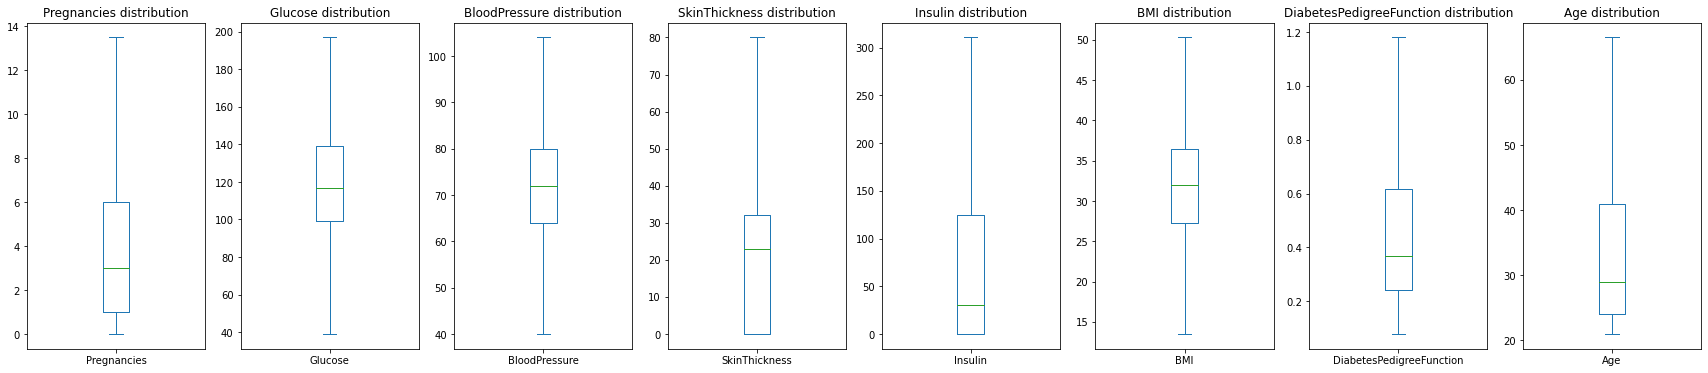

In [493]:
# Recheck Boxplot after outlier handling

fig, ax =plt.subplots(1,8, figsize = (30,6))
X_train['Pregnancies'].plot(kind='box', title='Pregnancies distribution',ax=ax[0])
X_train['Glucose'].plot(kind='box', title='Glucose distribution',ax=ax[1])
X_train['BloodPressure'].plot(kind='box', title='BloodPressure distribution',ax=ax[2])
X_train['SkinThickness'].plot(kind='box', title='SkinThickness distribution',ax=ax[3])
X_train['Insulin'].plot(kind='box', title='Insulin distribution',ax=ax[4])
X_train['BMI'].plot(kind='box', title='BMI distribution',ax=ax[5])
X_train['DiabetesPedigreeFunction'].plot(kind='box', title='DiabetesPedigreeFunction distribution',ax=ax[6])
X_train['Age'].plot(kind='box', title='Age distribution',ax=ax[7])

## Split between Numerical Columns and Categorical Columns

In [494]:
# Split numerical and categorical based on dt types

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
print('Numerical Columns : ', num_columns)

# Split Train-Set and Train-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

# Checking features and target length

print('\nFeatures Train numeric length = ', len(X_train_num))
print('Features Test numeric length = ', len(X_test_num))

Numerical Columns :  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Features Train numeric length =  606
Features Test numeric length =  152


## Feature Scaling

Later feature scaling will be defined using the Pipeline algorithm.

,0,1,2,3,4,5,6,7
features,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Skew,0.852062,0.429564,-0.209497,0.047267,1.147877,0.157954,1.016628,1.031227
Standard Dev,3.309168,30.859123,13.413958,15.768756,88.810729,6.866994,0.282709,11.537394


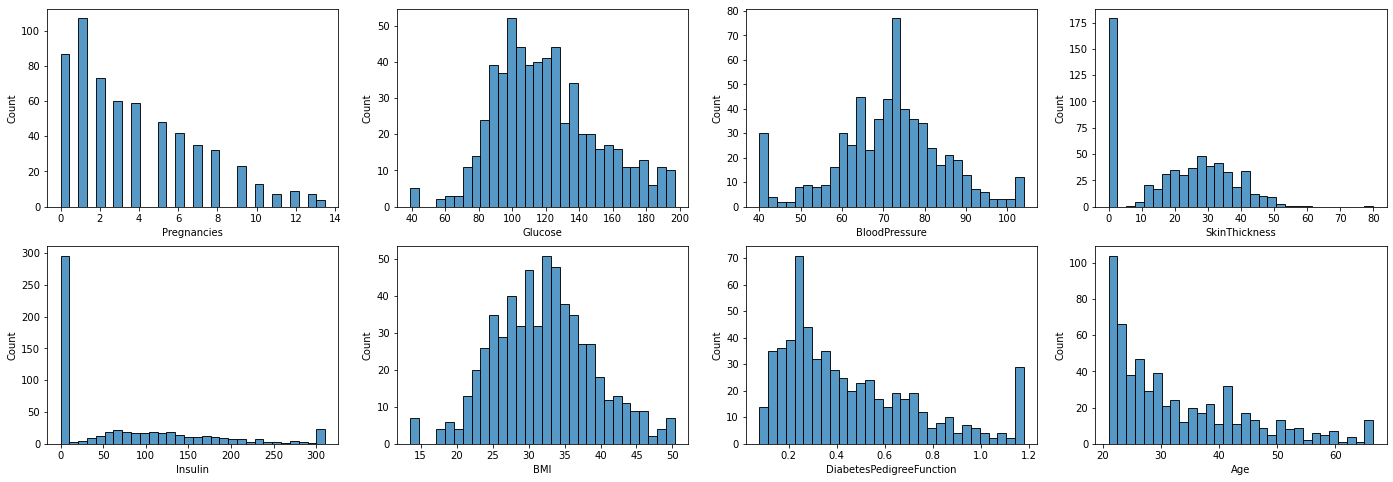

In [495]:
# Display Numerical Histo Plotand Skewness

fig, ax =plt.subplots(2,4, figsize = (24,8))
sns.histplot(X_train['Pregnancies'], bins=30, ax=ax[0,0])
sns.histplot(X_train['Glucose'], bins=30, ax=ax[0,1])
sns.histplot(X_train['BloodPressure'], bins=30, ax=ax[0,2])
sns.histplot(X_train['SkinThickness'], bins=30, ax=ax[0,3])
sns.histplot(X_train['Insulin'], bins=30, ax=ax[1,0])
sns.histplot(X_train['BMI'], bins=30, ax=ax[1,1])
sns.histplot(X_train['DiabetesPedigreeFunction'], bins=30, ax=ax[1,2])
sns.histplot(X_train['Age'], bins=30, ax=ax[1,3])

data_skewness = pd.DataFrame(columns=["features", "Skew", "Standard Dev"], 
                                data=[['Pregnancies',X_train['Pregnancies'].skew(),X_train['Pregnancies'].std()],
                                    ['Glucose',X_train['Glucose'].skew(),X_train['Glucose'].std()],
                                    ['BloodPressure', X_train['BloodPressure'].skew(), X_train['BloodPressure'].std()],
                                    ['SkinThickness', X_train['SkinThickness'].skew(), X_train['SkinThickness'].std()],
                                    ['Insulin',X_train['Insulin'].skew(),X_train['Insulin'].std()],
                                    ['BMI',X_train['BMI'].skew(),X_train['BMI'].std()],
                                    ['DiabetesPedigreeFunction',X_train['DiabetesPedigreeFunction'].skew(),X_train['DiabetesPedigreeFunction'].std()],
                                    ['Age',X_train['Age'].skew(),X_train['Age'].std()]
                                    ])

data_skewness.T

Based on the results of the image above, some of the data are close to the normal distribution but the Standard Deviation is quite varied. Therefore, because the Outler has also been handled, the Scaling that will be used is the Minmax Scaler.

In [496]:
# Pipeline Model for Data

num_split_minmax = num_columns

# Define Pipeline for Scaling

num_minmax_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler()
                             )

# Merging scaling/encoding with column which need to be scaling/encoding

data_pipeline = ColumnTransformer([
    # ('pipeline_minmax', num_minmax_pipeline, num_split_minmax)
    ('pipeline_robust', num_minmax_pipeline, num_split_minmax)
    # ('pipeline_standard', num_standard_pipeline, num_split_minmax)
])

# 6 - Model Definition

The model that will be selected is the main classification model that has been taught during Phase 1. The models are Logistic Regression, KNN, Naive Bayes, SVM, Decision Tree, and Random Forest. Later, not all models will be selected for classification, but the previous cross validation will be carried out and then the top 4 models with the highest mean cross validation score will be selected. Each of these models will then be performed hyperparameter tuning with Grid Search (like the steps in Milestone 1). The selected hyperparameter is also the most frequently considered hyperparameter. However, due to limited CPU and device capacity, many hyperparameters will not be used. If there are many hyperparameters, then the software is most likely to crash.

In [497]:
# Make pipeline for each model

final_log_reg_pipeline_default = make_pipeline(data_pipeline, LogisticRegression())
final_knn_pipeline_default = make_pipeline(data_pipeline, KNeighborsClassifier())
final_nb_pipeline_default = make_pipeline(data_pipeline, BernoulliNB())
final_svc_pipeline_default = make_pipeline(data_pipeline, SVC())
final_desc_tree_pipeline_default = make_pipeline(data_pipeline, DecisionTreeClassifier())
final_rndm_forest_pipeline_default = make_pipeline(data_pipeline, RandomForestClassifier())

In [498]:
# Cross Validation with K-fold

kfold = KFold(n_splits=10, random_state=None, shuffle=False)

scores_log_reg_default_kfold = cross_val_score(final_log_reg_pipeline_default, X_train, y_train, cv=kfold)
scores_knn_default_kfold = cross_val_score(final_knn_pipeline_default, X_train, y_train, cv=kfold)
scores_nb_default_kfold = cross_val_score(final_nb_pipeline_default, X_train, y_train, cv=kfold)
scores_svc_default_kfold = cross_val_score(final_svc_pipeline_default, X_train, y_train, cv=kfold)
scores_desc_tree_default_kfold = cross_val_score(final_desc_tree_pipeline_default, X_train, y_train, cv=kfold)
scores_rndm_forest_default_kfold = cross_val_score(final_rndm_forest_pipeline_default, X_train, y_train, cv=kfold)

# 7 - Model Training

In [499]:


cross_val_kfold_result = pd.DataFrame(columns=["Model", "Accuracy Mean", "Accuracy Stdev"], 
                                data=[['Logistic Regression',scores_log_reg_default_kfold.mean(), scores_log_reg_default_kfold.std()],
                                    ['KNN',scores_knn_default_kfold.mean(), scores_knn_default_kfold.std()],
                                    ['Naive Bayes',scores_nb_default_kfold.mean(), scores_nb_default_kfold.std()],
                                    ['SVM',scores_svc_default_kfold.mean(), scores_svc_default_kfold.std()],
                                    ['Decision Tree',scores_desc_tree_default_kfold.mean(), scores_desc_tree_default_kfold.std()],
                                    ['Random Forest',scores_rndm_forest_default_kfold.mean(), scores_rndm_forest_default_kfold.std()]
                                    ])


cross_val_kfold_result.sort_values(by="Accuracy Mean", ascending=False)

,Model,Accuracy Mean,Accuracy Stdev
0,Logistic Regression,0.757268,0.061192
5,Random Forest,0.747377,0.063487
3,SVM,0.745683,0.062361
1,KNN,0.702978,0.074825
4,Decision Tree,0.673361,0.055925
2,Naive Bayes,0.648579,0.073087


From the Cross Validation results obtained, the top 4 models with the highest accuracy mean are Logistic Regression, Random Forest, SVM, KKN. However, the smallest standard deviations are SVM, Naive Bayes, Logistic Regression, and Random Forest. The standard deviation of each model's accuracy gap is not too far away, for that the four models with the highest accuracy mean score will be selected. When calculated with the Standard Deviation of Accuracy, these models have a score of approximately as follows:

In [500]:
knn_model_acc_mean = cross_val_kfold_result[(cross_val_kfold_result['Model'] == 'KNN')]['Accuracy Mean']
knn_model_acc_std = cross_val_kfold_result[(cross_val_kfold_result['Model'] == 'KNN')]['Accuracy Stdev']
print('The accuracy of the KNN model is between ', float(knn_model_acc_mean - knn_model_acc_std), 'and ', float(knn_model_acc_mean + knn_model_acc_std))

rndm_forest_model_acc_mean = cross_val_kfold_result[(cross_val_kfold_result['Model'] == 'Random Forest')]['Accuracy Mean']
rndm_forest_model_acc_std = cross_val_kfold_result[(cross_val_kfold_result['Model'] == 'Random Forest')]['Accuracy Stdev']
print('The accuracy of the Random Forest model is between ', float(rndm_forest_model_acc_mean - rndm_forest_model_acc_std), 'and ', float(rndm_forest_model_acc_mean + rndm_forest_model_acc_std))

svc_model_acc_mean = cross_val_kfold_result[(cross_val_kfold_result['Model'] == 'SVM')]['Accuracy Mean']
svc_model_acc_std = cross_val_kfold_result[(cross_val_kfold_result['Model'] == 'SVM')]['Accuracy Stdev']
print('The accuracy of the SVC model is between ', float(svc_model_acc_mean - svc_model_acc_std), 'and ', float(svc_model_acc_mean + svc_model_acc_std))

log_reg_model_acc_mean = cross_val_kfold_result[(cross_val_kfold_result['Model'] == 'Logistic Regression')]['Accuracy Mean']
log_reg_model_acc_std = cross_val_kfold_result[(cross_val_kfold_result['Model'] == 'Logistic Regression')]['Accuracy Stdev']
print('The accuracy of the Logistic Regression model is between ', float(log_reg_model_acc_mean - log_reg_model_acc_std), 'and ', float(log_reg_model_acc_mean + log_reg_model_acc_std))


The accuracy of the KNN model is between  0.6281528107180266 and  0.7778034734349787
The accuracy of the Random Forest model is between  0.6838897283074734 and  0.8108643700531821
The accuracy of the SVC model is between  0.6833218881880933 and  0.8080442320304856
The accuracy of the Logistic Regression model is between  0.6960761621181097 and  0.8184593570075731


From the results of the Accuracy range, it can be confirmed that Logistic Regression is the highest.

KNN
---

In [501]:
# Training using KNN with Grid Search 

new_parameter_knn = {
                'n_neighbors': [10, 100, 1000],
                'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

gridsearch_knn = GridSearchCV(KNeighborsClassifier(), new_parameter_knn,
                          return_train_score=True)
                          
knn_pipeline_gridsearch = make_pipeline(data_pipeline, gridsearch_knn)
best_model_knn = knn_pipeline_gridsearch.fit(X_train, y_train)

print("Best parameters: {}".format(gridsearch_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(gridsearch_knn.best_score_))

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(

Best parameters: {'algorithm': 'auto', 'n_neighbors': 10}
Best cross-validation score: 0.70


/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(

SVM
---

In [502]:
# Training using SVM with Grid Search 

new_parameter_svc = {
                'C': [0.01, 0.1, 1, 10],
                'gamma': [0.01, 0.1, 1, 10]
}

gridsearch_svc = GridSearchCV(SVC(), new_parameter_svc,
                          return_train_score=True)
                          
svc_pipeline_gridsearch = make_pipeline(data_pipeline, gridsearch_svc)
best_model_svc = svc_pipeline_gridsearch.fit(X_train, y_train)

print("Best parameters: {}".format(gridsearch_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(gridsearch_svc.best_score_))


Best parameters: {'C': 1, 'gamma': 1}
Best cross-validation score: 0.77


Random Forest
---

In [503]:
# Training using Random forest with Grid Search 


new_parameter_rndm_forest = {
                'n_estimators': [1, 10, 100, 1000],
                'ccp_alpha': [0, 1, 2, 3]
}

gridsearch_rndm_forest = GridSearchCV(RandomForestClassifier(), new_parameter_rndm_forest,
                          return_train_score=True)
                          
rndm_forest_pipeline_gridsearch = make_pipeline(data_pipeline, gridsearch_rndm_forest)
best_model_rndm_forest = rndm_forest_pipeline_gridsearch.fit(X_train, y_train)

print("Best parameters: {}".format(gridsearch_rndm_forest.best_params_))
print("Best cross-validation score: {:.2f}".format(gridsearch_rndm_forest.best_score_))


Best parameters: {'ccp_alpha': 0, 'n_estimators': 1000}
Best cross-validation score: 0.76


Logistic Regression
---

In [504]:
# Training using Logistic Regression with Grid Search 

new_parameter_log_reg = {
                'C': [1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

gridsearch_log_reg = GridSearchCV(LogisticRegression(), new_parameter_log_reg,
                          return_train_score=True)
                          
log_reg_pipeline_gridsearch = make_pipeline(data_pipeline, gridsearch_log_reg)
best_model_log_reg = log_reg_pipeline_gridsearch.fit(X_train, y_train)

print("Best parameters: {}".format(gridsearch_log_reg.best_params_))
print("Best cross-validation score: {:.2f}".format(gridsearch_log_reg.best_score_))



Best parameters: {'C': 100, 'solver': 'newton-cg'}
Best cross-validation score: 0.77


# 8 - Model Evaluation

KNN
---

Best Model accuracy score train :  0.7788778877887789
Best Model accuracy score test :  0.7631578947368421 

Best Model classification report train : 
               precision    recall  f1-score   support

           0       0.77      0.93      0.85       397
           1       0.80      0.48      0.60       209

    accuracy                           0.78       606
   macro avg       0.78      0.71      0.72       606
weighted avg       0.78      0.78      0.76       606
 

Best Model classification report test : 
               precision    recall  f1-score   support

           0       0.76      0.93      0.83        97
           1       0.79      0.47      0.59        55

    accuracy                           0.76       152
   macro avg       0.77      0.70      0.71       152
weighted avg       0.77      0.76      0.75       152

Best Model Confusion matrix - Train (Left) and Test(Right)


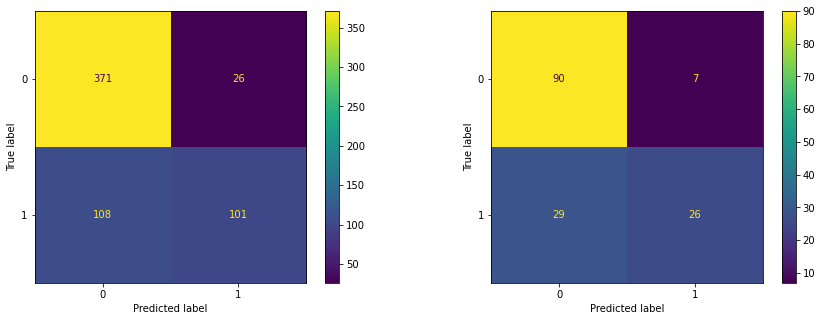

In [505]:
# Predict Best Model model

knn_y_pred_train_grid = knn_pipeline_gridsearch.predict(X_train)
knn_y_pred_test_grid = knn_pipeline_gridsearch.predict(X_test)

# Display Best Model Accuracy

print('Best Model accuracy score train : ',accuracy_score(y_train,knn_y_pred_train_grid))
print('Best Model accuracy score test : ',accuracy_score(y_test,knn_y_pred_test_grid),'\n')

# Display Best Model Classification Report

print('Best Model classification report train : \n',classification_report(y_train,knn_y_pred_train_grid),'\n')
print('Best Model classification report test : \n',classification_report(y_test,knn_y_pred_test_grid))

# Display Best Model Confusion matrix - Train (Left) and Test(Right)

print('Best Model Confusion matrix - Train (Left) and Test(Right)')

fig, ax =plt.subplots(1,2, figsize = (15,5))
cm_knn_train = confusion_matrix(y_train, knn_y_pred_train_grid, labels=knn_pipeline_gridsearch.classes_)
dispknn_train = ConfusionMatrixDisplay(confusion_matrix=cm_knn_train,display_labels=knn_pipeline_gridsearch.classes_)
dispknn_train.plot(ax=ax[0])
cm_knn_test = confusion_matrix(y_test, knn_y_pred_test_grid, labels=knn_pipeline_gridsearch.classes_)
disp_knn_test = ConfusionMatrixDisplay(confusion_matrix=cm_knn_test,display_labels=knn_pipeline_gridsearch.classes_)
disp_knn_test.plot(ax=ax[1])
plt.show()

KNN has the lowest accuracy of the four selected models with selected hyperparameter {'algorithm': 'auto', 'n_neighbors': 10}. This can be confirmed by the number of True labels = 1 but predicted labels = 0 which is more than the number of True and predicted labels = 1. When viewed from the precision, recall, and the F1 scores, the KNN model is overfit but the difference is not that significant.

SVM
---

Best Model accuracy score train :  0.8003300330033003
Best Model accuracy score test :  0.7828947368421053 

Best Model classification report train : 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       397
           1       0.78      0.59      0.67       209

    accuracy                           0.80       606
   macro avg       0.79      0.75      0.76       606
weighted avg       0.80      0.80      0.79       606
 

Best Model classification report test : 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        97
           1       0.81      0.53      0.64        55

    accuracy                           0.78       152
   macro avg       0.79      0.73      0.74       152
weighted avg       0.79      0.78      0.77       152

Best Model Confusion matrix - Train (Left) and Test(Right)


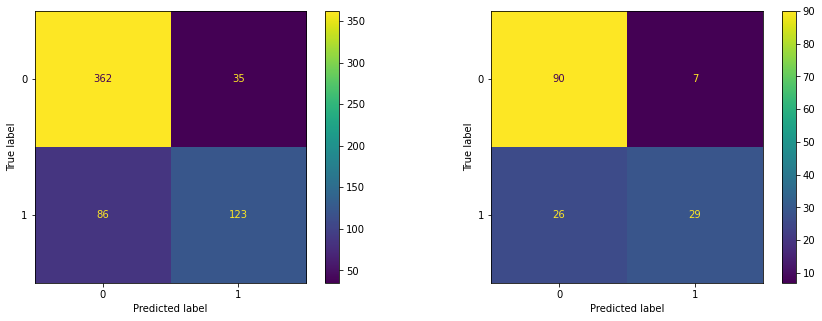

In [506]:
# Predict Best Model model

svc_y_pred_train_grid = svc_pipeline_gridsearch.predict(X_train)
svc_y_pred_test_grid = svc_pipeline_gridsearch.predict(X_test)

# Display Best Model Accuracy

print('Best Model accuracy score train : ',accuracy_score(y_train,svc_y_pred_train_grid))
print('Best Model accuracy score test : ',accuracy_score(y_test,svc_y_pred_test_grid),'\n')

# Display Best Model Classification Report

print('Best Model classification report train : \n',classification_report(y_train,svc_y_pred_train_grid),'\n')
print('Best Model classification report test : \n',classification_report(y_test,svc_y_pred_test_grid))

# Display Best Model Confusion matrix - Train (Left) and Test(Right)

print('Best Model Confusion matrix - Train (Left) and Test(Right)')

fig, ax =plt.subplots(1,2, figsize = (15,5))
cm_svc_train = confusion_matrix(y_train, svc_y_pred_train_grid, labels=svc_pipeline_gridsearch.classes_)
dispsvc_train = ConfusionMatrixDisplay(confusion_matrix=cm_svc_train,display_labels=svc_pipeline_gridsearch.classes_)
dispsvc_train.plot(ax=ax[0])
cm_svc_test = confusion_matrix(y_test, svc_y_pred_test_grid, labels=svc_pipeline_gridsearch.classes_)
disp_svc_test = ConfusionMatrixDisplay(confusion_matrix=cm_svc_test,display_labels=svc_pipeline_gridsearch.classes_)
disp_svc_test.plot(ax=ax[1])
plt.show()


Previously SVC model was the 3rd best model. This model has hyperparameters {'C': 1, 'gamma': 1} . Similiar as before, when looked from the accuracy, precision, recall, and the F1 scores, this model tends to overfit. The gap between the train and test performance scores is also quite up from the previous KNN model.

Random Forest
---

Best Model accuracy score train :  1.0
Best Model accuracy score test :  0.8092105263157895 

Best Model classification report train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       209

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606
 

Best Model classification report test : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        97
           1       0.76      0.69      0.72        55

    accuracy                           0.81       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.81      0.81      0.81       152

Best Model Confusion matrix - Train (Left) and Test(Right)


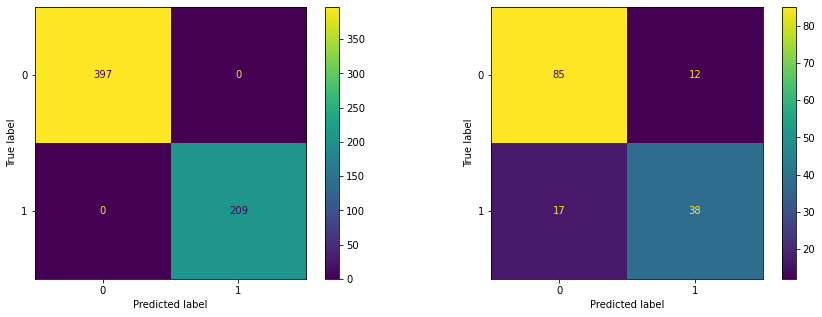

In [507]:
# Predict Best Model model

rndm_forest_y_pred_train_grid = rndm_forest_pipeline_gridsearch.predict(X_train)
rndm_forest_y_pred_test_grid = rndm_forest_pipeline_gridsearch.predict(X_test)

# Display Best Model Accuracy

print('Best Model accuracy score train : ',accuracy_score(y_train,rndm_forest_y_pred_train_grid))
print('Best Model accuracy score test : ',accuracy_score(y_test,rndm_forest_y_pred_test_grid),'\n')

# Display Best Model Classification Report

print('Best Model classification report train : \n',classification_report(y_train,rndm_forest_y_pred_train_grid),'\n')
print('Best Model classification report test : \n',classification_report(y_test,rndm_forest_y_pred_test_grid))

# Display Best Model Confusion matrix - Train (Left) and Test(Right)

print('Best Model Confusion matrix - Train (Left) and Test(Right)')

fig, ax =plt.subplots(1,2, figsize = (15,5))
cm_rndm_forest_train = confusion_matrix(y_train, rndm_forest_y_pred_train_grid, labels=rndm_forest_pipeline_gridsearch.classes_)
disprndm_forest_train = ConfusionMatrixDisplay(confusion_matrix=cm_rndm_forest_train,display_labels=rndm_forest_pipeline_gridsearch.classes_)
disprndm_forest_train.plot(ax=ax[0])
cm_rndm_forest_test = confusion_matrix(y_test, rndm_forest_y_pred_test_grid, labels=rndm_forest_pipeline_gridsearch.classes_)
disp_rndm_forest_test = ConfusionMatrixDisplay(confusion_matrix=cm_rndm_forest_test,display_labels=rndm_forest_pipeline_gridsearch.classes_)
disp_rndm_forest_test.plot(ax=ax[1])
plt.show()



Hyperparameter Random Forest yang terpilih adalah {'ccp_alpha': 0, 'n_estimators': 1000}. Untuk hasil dari Model Random Forest, accuracy, precision, recall, and the F1 score nya juga masih  sangat overfit. Bahkan perbedaan accuracy, precision, recall, and the F1 scores nya sangat significant dari semua model. Bisa dilihat pada Confussion Matrix bahwa di train skoenya sangat baik namun pada testnya masih terdapat misklasifikasi. Tetapi jumlah misklasifikasi True labels = 1 but predicted labels = 0 cukup berkurang.

Logistic Regression
---

Best Model accuracy score train :  0.7706270627062707
Best Model accuracy score test :  0.7960526315789473 

Best Model classification report train : 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       397
           1       0.72      0.56      0.63       209

    accuracy                           0.77       606
   macro avg       0.75      0.72      0.73       606
weighted avg       0.76      0.77      0.76       606
 

Best Model classification report test : 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.74      0.67      0.70        55

    accuracy                           0.80       152
   macro avg       0.78      0.77      0.77       152
weighted avg       0.79      0.80      0.79       152

Best Model Confusion matrix - Train (Left) and Test(Right)


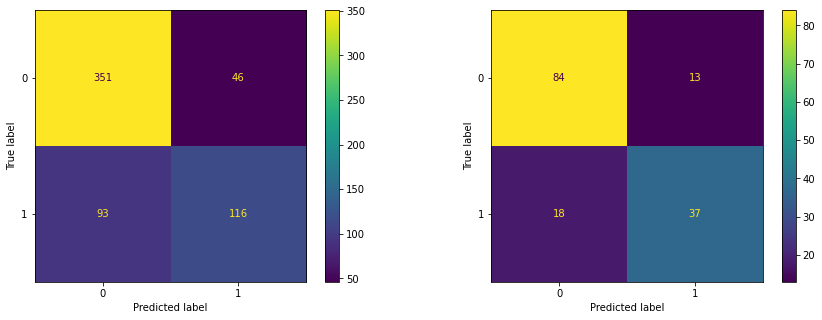

In [508]:
# Predict Best Model model

log_reg_y_pred_train_grid = log_reg_pipeline_gridsearch.predict(X_train)
log_reg_y_pred_test_grid = log_reg_pipeline_gridsearch.predict(X_test)

# Display Best Model Accuracy

print('Best Model accuracy score train : ',accuracy_score(y_train,log_reg_y_pred_train_grid))
print('Best Model accuracy score test : ',accuracy_score(y_test,log_reg_y_pred_test_grid),'\n')

# Display Best Model Classification Report

print('Best Model classification report train : \n',classification_report(y_train,log_reg_y_pred_train_grid),'\n')
print('Best Model classification report test : \n',classification_report(y_test,log_reg_y_pred_test_grid))

# Display Best Model Confusion matrix - Train (Left) and Test(Right)

print('Best Model Confusion matrix - Train (Left) and Test(Right)')

fig, ax =plt.subplots(1,2, figsize = (15,5))
cm_log_reg_train = confusion_matrix(y_train, log_reg_y_pred_train_grid, labels=log_reg_pipeline_gridsearch.classes_)
displog_reg_train = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_train,display_labels=log_reg_pipeline_gridsearch.classes_)
displog_reg_train.plot(ax=ax[0])
cm_log_reg_test = confusion_matrix(y_test, log_reg_y_pred_test_grid, labels=log_reg_pipeline_gridsearch.classes_)
disp_log_reg_test = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_test,display_labels=log_reg_pipeline_gridsearch.classes_)
disp_log_reg_test.plot(ax=ax[1])
plt.show()

Logistic Regression is the best model for this case according to cross validation. The best selected hyperparameter is {'C': 100, 'solver': 'newton-cg'}. From the accuracy, precision, recall, and the F1 scores, this model is also overfit but different from the previous model, which tends to overfit on train, this model overfit on the test. When viewed from the number of True labels = 1 but predicted labels = 0 on the train, the number is quite down from the previous model except for Random Forest. But even so, the difference in scores between the train and test is not much like in Random Forest.

Dari keempat model tersebut sudah dijelaskan mengenai hasi performance metricesnya. Sebelumnya pada pembahasan model-model tersebut kita hanya fokus pada True labels = 1 but predicted labels = 0 nya. Arti dari label ini adalah Orang yang seharusnya diabetes namun terprediksi tidak memiliki diabetes. Dalam kasus ini, terutama kasus kesehatan kita akan mengurangi jumlah tersebut. Hal ini dikarenakan kasus ini menyangkut nyawa seseorang yang apabila tidak ditangani dengan penganganan yang tepat bisa berakibat fatal untuk pasien. Oleh karena itu karena model sebelumnya masih terdapat banyak jumlah misklasifikasi pada True labels = 1 but predicted labels = 0 maka akan ditingkatkan recall pada 1 (Have diabetes) tersebut. Untuk meningkatkan recall bisa dilakukan dengan manipulasi Threshold dengan cara berikut.

Best Model classification report train : 
               precision    recall  f1-score   support

           0       0.99      0.20      0.33       397
           1       0.39      1.00      0.57       209

    accuracy                           0.47       606
   macro avg       0.69      0.60      0.45       606
weighted avg       0.78      0.47      0.41       606
 

Best Model classification report test : 
               precision    recall  f1-score   support

           0       1.00      0.16      0.28        97
           1       0.40      1.00      0.58        55

    accuracy                           0.47       152
   macro avg       0.70      0.58      0.43       152
weighted avg       0.78      0.47      0.39       152

Best Model Confusion matrix - Train (Left) and Test(Right)


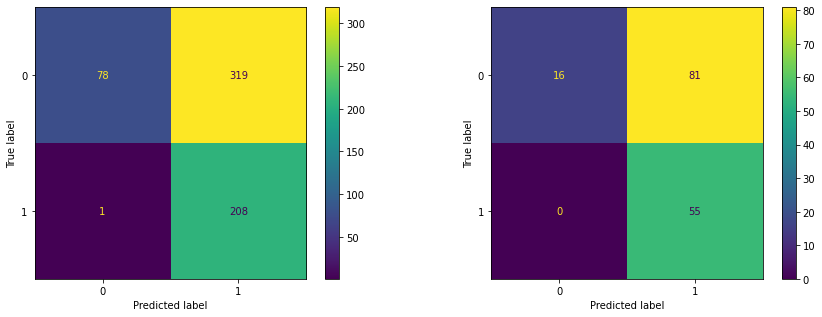

In [551]:
# Define Threshold

threshold = 0.07
log_reg_modif = log_reg_pipeline_gridsearch.fit(X_train, y_train)

predicted_proba1 = log_reg_modif.predict_proba(X_train)
predicted_proba2 = log_reg_modif.predict_proba(X_test)
predicted1 = (predicted_proba1 [:,1] >= threshold).astype('int')
predicted2 = (predicted_proba2 [:,1] >= threshold).astype('int')

# Display Best Model Classification Report

print('Best Model classification report train : \n',classification_report(y_train,predicted1),'\n')
print('Best Model classification report test : \n',classification_report(y_test,predicted2))

# Display Best Model Confusion matrix

print('Best Model Confusion matrix - Train (Left) and Test(Right)')

fig, ax =plt.subplots(1,2, figsize = (15,5))
cm_best_model_train = confusion_matrix(y_train, predicted1, labels=log_reg_modif.classes_)
dispbest_model_train = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_train,display_labels=log_reg_modif.classes_)
dispbest_model_train.plot(ax=ax[0])
cm_best_model_test = confusion_matrix(y_test,predicted2, labels=log_reg_modif.classes_)
disp_best_model_test = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_test,display_labels=log_reg_modif.classes_)
disp_best_model_test.plot(ax=ax[1])




From the improvement results above, we can see that the number of True labels = 1 but predicted labels = 0 is decreasing but the number of True labels = 0 but predicted labels = 1 is increasing. This is because we increase recall at value 1 so that recall at value 0 and precision at value 1 decreases. This is one method of increasing recall by reducing the threshold from 0.5 to 0.07. The accuracy of this model is drastically reduced, but if it will be used to check the disease it will be better than using an unimproved model. For this reason, this model will be recommended in the future to detect whether a person has diabetes or not. We can make patients who are predicted to have diabetes but don't have diabetes to become an aware for both patients and doctor.

In [552]:
# from sklego.meta import Thresholder

# threshold_pipeline = make_pipeline(data_pipeline, Thresholder(log_reg_pipeline_gridsearch, threshold))
# threshold_pipeline.fit(X_train,y_train);

# 9 - Model Saving

In [559]:
# Savinng files

with open('log_reg_pipelinee.pkl','wb') as file_1:
    joblib.dump(log_reg_pipeline_gridsearch, file_1)

with open('mm_scaler.pkl', 'wb') as file_2:
     joblib.dump(num_minmax_pipeline, file_2)

with open('list_num_cols.txt', 'w') as file_3:
     json.dump(num_split_minmax, file_3)

# 10 - Model Inference

In [554]:
# Model Inference prediction

knn_inf = pd.DataFrame(knn_pipeline_gridsearch.predict(df_inf), columns=['Outcome - KNN'])
svm_inf = pd.DataFrame(svc_pipeline_gridsearch.predict(df_inf), columns=['Outcome - SVM'])
rndm_forest_inf = pd.DataFrame(rndm_forest_pipeline_gridsearch.predict(df_inf), columns=['Outcome - Rdm Frst'])
log_reg_inf = pd.DataFrame(log_reg_pipeline_gridsearch.predict(df_inf), columns=['Outcome - Log Reg'])
choosen_inf = pd.DataFrame((log_reg_modif.predict_proba(df_inf)[:,1] >= threshold).astype('int'), columns=['Outcome - Log Reg Modif'])

In [555]:
# Concate into Inference Table
df_inf_with_pred = pd.concat([df_inf, knn_inf, svm_inf, rndm_forest_inf, log_reg_inf, choosen_inf], axis = 1)
df_inf_with_pred

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome - KNN,Outcome - SVM,Outcome - Rdm Frst,Outcome - Log Reg,Outcome - Log Reg Modif
0,0,105,84,0,0,27.9,0.741,62,1,0,0,0,0,1
1,4,76,62,0,0,34.0,0.391,25,0,0,0,0,0,1
2,4,96,56,17,49,20.8,0.340,26,0,0,0,0,0,0
3,3,106,54,21,158,30.9,0.292,24,0,0,0,0,0,1
4,3,78,50,32,88,31.0,0.248,26,1,0,0,0,0,0
5,7,196,90,0,0,39.8,0.451,41,1,1,1,1,1,1
6,1,193,50,16,375,25.9,0.655,24,0,0,1,1,1,1
7,1,131,64,14,415,23.7,0.389,21,0,0,0,0,0,1
8,2,82,52,22,115,28.5,1.699,25,0,0,0,0,0,1
9,10,108,66,0,0,32.4,0.272,42,1,0,0,0,0,1


In [556]:
# Showing Outcome
df_inf_with_pred[['Outcome','Outcome - KNN','Outcome - SVM','Outcome - Rdm Frst','Outcome - Log Reg','Outcome - Log Reg Modif']]

,Outcome,Outcome - KNN,Outcome - SVM,Outcome - Rdm Frst,Outcome - Log Reg,Outcome - Log Reg Modif
0,1,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,1,1,1,1,1,1
6,0,0,1,1,1,1
7,0,0,0,0,0,1
8,0,0,0,0,0,1
9,1,0,0,0,0,1


Based on the results of the classification in the inference model, the KNN, SVM, Random Forest, and Logistic Regression models still incorrectly predict a person who vave diabetes. However, if = use the Logistic Regression model whose threshold is changed, at least only one cannot be predicted, namely number 4.

# 11 - Conclusion

Based on EDA

- The data only explains whether the person has diabetes or not. It was not explained whether the diabetes are type 1 diabetes, type 2 diabetes, orgestational diabetes.
- The number of data classes 0 (No Diabetes) is larger than the number of data classes 1 (Diabetes). It can be concluded that the current data is imbalance.
- From any age range, anyone can get diabetes. This data does not provide information on what type of diabetes these patients have so it might be difficult to classify.
- A person's BMI level is one of the factors that cause Type 2 Diabetes. The surveys showed that an increase in BMI is generally associated with a significant increase in prevalence of diabetes mellitus. Also quoted from a journal, there is a relationship between Body Mass Index (BMI) and blood sugar levels, especially in type 2 diabetics.
- Patients whose BMI and glucose are low are less likely to have Diabetes. Even though there are outliers, the data clustering is still quite explicit.
- The highest number of births was 17 times and from the diagnosis, the person has diabetes. As previously explained, there is no information on the type of diabetes that affects the woman who is or has been pregnant because here it is only explained how many times the person gave birth. However, it is possible that some have gestational diabetes.
- Hypertension (Highblood Pressure) might not cause diabetes directly, but it could increase the risk of someone developing diabetes if they have high blood pressure. If people have diabetes, they more likely to have high blood pressure. Based on data, the range for people who have diabetes and do not have diabetes is similiar the only difference is number since the data is imbalance. It means diabetes can attack at any blood pressure.
- Based on the data, the insulin range for people who are not detected as having diabetes is 0 - 744 mu U/ml. Meanwhile, for those who are detected to have diabetes, the range is 0-846 mu U/ml. The range for those who have and do not have diabetes is not too much different.
- Diabetes Pedigree Function is an indicator of the history of offspring affected by diabetes. From the value in people who are not diabetic, the Diabetes Pedigree Function range is 0.078 to 2,329 while in people with diabetes the range is 0.088 to 2.42. Based on data, he two ranges are not significantly different. However, the greater the index value, the greater the chance of having diabetes.
- Skin thickness in diabetics will increase significantly. The normal range for this skin thickness is 1.60 mm to 25.45 mm in male and 3.40 mm to 25.20 mm in female.Based on the data, the largest skin thickness without diabetes was 60 mm, while the largest range for those with diabetes was 99 mm. This proves that thick skin tends to suffer from diabetes.



Based on the previous objective, a model will be made to predict whether the person has diabetes or not. The model will be created using the attributes 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction' and 'Age' selected as a feature to predict 'Outcome'. Furthermore, before making the model, the data is reprocessed first by handling the missing values ​​and outliers and scaling with the Minmax Scaler. After scaling, the modeling is carried out with several classification algorithms, which are searched for the best 4 models using Cross validation. From cross validation, the best 4 results were obtained for further hyperparameter tuning with Grid Search. The four models are Logistic Regression, Random Forest, SVM, and KNN. After doing a Grid Search with several hyperparameters, the performance metrics are looked for which are deemed necessary to choose which model to use in the end. The final model used is Logistic Regression because the gap score between the train and the test is not too far away. It doesn't stop there, to reduce the number of True labels = 1 but predicted labels = 0, the threshold is reduced which is used to expand the predicting range 1. Below is the result of classification report for each Logistic Regression.

Logistic Regression classification report test before improvement: 

               precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.74      0.67      0.70        55

    accuracy                           0.80       152

Logistic Regression classification report test before improvement: 

               precision    recall  f1-score   support

           0       1.00      0.16      0.28        97
           1       0.40      1.00      0.58        55

    accuracy                           0.47       152

We increase the recall from 0.67 to 1.00 but decrease the precision to 0.4. This is beneficial to reduce the risk of endangering patient's life.

For further development, it is possible to search for better hyperparameters by providing a more complete and wider range of hyperparameters. Because the device used is still not able to process the models with the hyperparameter tuning, it can be done on other devices that are more capable. If necessary, we need to model with several learning ensembles such as Adaboost, Gradient Boosting, and others to find a more accurate model.